# Chapter 9

## Question 7

Using SVMs to predict mpg using the `Auto` data set

In [1]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sklearn.svm
import sklearn.model_selection


In [2]:
auto_dataset = sm.datasets.get_rdataset("Auto", "ISLR").data
auto_dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### (a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median

In [3]:
mpg_boolean = auto_dataset.mpg > auto_dataset.mpg.median()
mpg_binary = list(int(x) for x in mpg_boolean)
auto_dataset["mpg_binary"] = mpg_binary

### (b) Fit an SVC to the data with various C values, in order to predict whether a car gets high or low gas mileage. Report the CV errors associated with different C values, and comment.

In [4]:
X = auto_dataset.drop(columns=["mpg", "mpg_binary", "name"])
y = auto_dataset.mpg_binary
linear_svm = sklearn.svm.LinearSVC(max_iter=1e6)
params = {"C": [10**x for x in range(-10, 5)]}
linear_cv = sklearn.model_selection.GridSearchCV(linear_svm, params, cv=5, n_jobs=4).fit(X,y)

/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [5]:
results = pd.DataFrame(linear_cv.cv_results_)[["param_C", "mean_test_score", "std_test_score"]]
results.head()

,param_C,mean_test_score,std_test_score
0,1e-10,0.500000,0.000000
1,1e-09,0.500000,0.000000
2,1e-08,0.500000,0.000000
3,1e-07,0.510204,0.021994
4,1e-06,0.897959,0.039303


Text(0.5, 0, 'Log(C)')

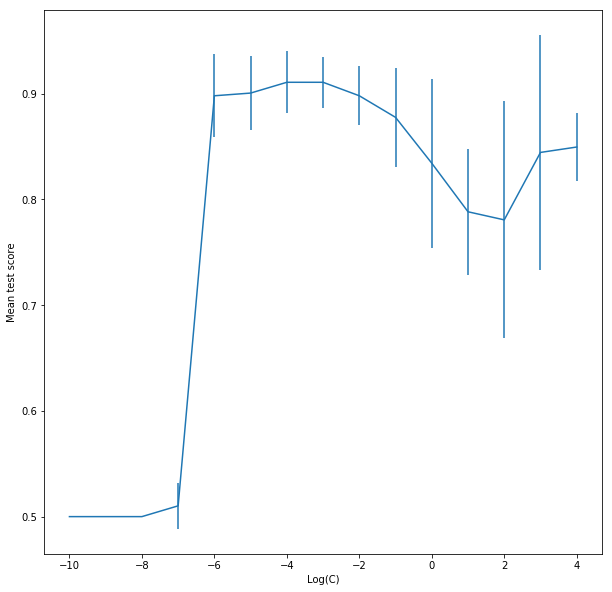

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
# print(results["param_C"])
results["logC"] = np.log10(list(results["param_C"]))


ax.errorbar(x="logC", y="mean_test_score", yerr="std_test_score", data=results)
ax.set_ylabel("Mean test score")
ax.set_xlabel("Log(C)")

We can do pretty well if we use a low value of C (i.e. tolerating noise in the data). If the value of C is too low we underfit, if the value is too high we (perhaps) overfit.

### (c) Repeat (b), this time using polynomial and radial kernels with different values of gamma, degree, and cost. Comment.

In [20]:

poly_svm = sklearn.svm.SVC(kernel="poly" )
params = {"C": [0.1, 1.0], "degree": [2,3]}
poly_cv = sklearn.model_selection.GridSearchCV(poly_svm, params, cv=5, n_jobs=4, verbose=10).fit(X,y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(392,), dtype=int64).
Pickling array (shape=(5, 392), dtype=int64).
Pickling array (shape=(2, 392), dtype=float64).
Pickling array (shape=(5,), dtype=object).
Pickling array (shape=(2,), dtype=object).
Pickling array (shape=(5,), dtype=int64).
Pickling array (shape=(392,), dtype=int64).
Pickling array (shape=(392,), dtype=int64).
Pickling array (shape=(312,), dtype=int64).
Pickling array (shape=(80,), dtype=int64).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(392,), dtype=int64).
Pickling array (shape=(5, 392), dtype=int64).
Pickling array (shape=(2, 392), dtype=float64).
Pickling array (shape=(5,), dtype=object).
Pickling array (shape=(2,), dtype=object).
Pickling array (shape=(5,), dtype=int64).
Pickling array (shape=(392,), dtype=int64).
Pickling array (shape=(392,),

KeyboardInterrupt: 

The `poly` kernel is really, really slow to compute!

In [22]:
poly_results = pd.DataFrame(poly_cv.cv_results_)[["param_C", "param_gamma", "param_degree","mean_test_score", "std_test_score"]]
fig, ax = plt.subplots(figsize=(10,10))
# print(results["param_C"])
poly_results["logC"] = np.log10(list(poly_results["param_C"]))

ax.errorbar(x="logC", y="mean_test_score", yerr="std_test_score", data=poly_results)
ax.set_ylabel("Mean test score")
ax.set_xlabel("Log(C)")

NameError: name 'poly_cv' is not defined

In [21]:

radial_svm = sklearn.svm.SVC(kernel="rbf")
params = {"C": [10**x for x in range(-5, 2,2)], "gamma":[10**x for x in range(-5, 2,2)]}
radial_cv = sklearn.model_selection.GridSearchCV(radial_svm, params, cv=5, n_jobs=4).fit(X,y)

/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [25]:
radial_results = pd.DataFrame(radial_cv.cv_results_)[["param_C", "param_gamma", "mean_test_score", "std_test_score"]]
# print(results["param_C"])
radial_results["logC"] = np.log10(list(radial_results["param_C"]))
radial_results["logGamma"] = np.log10(list(radial_results["param_gamma"]))

### (d) Make some plots to back up your assertions in (b) and (c)

,mean_test_score,std_test_score,logC
logGamma,,,
-5.0,0.882015,0.034293,-2.0
-3.0,0.753827,0.050003,-2.0
-1.0,0.543367,0.042622,-2.0
1.0,0.505740,0.011516,-2.0


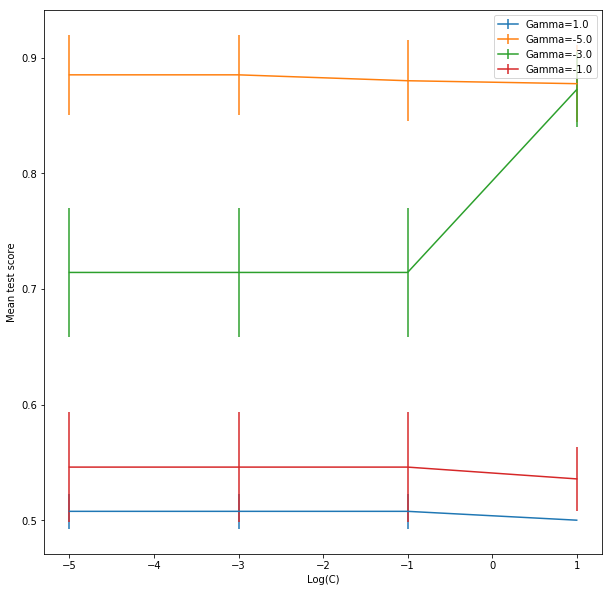

In [30]:

fig, ax = plt.subplots(figsize=(10,10))

for loggamma in set(radial_results["logGamma"]): 
    ax.errorbar(x="logC",
                y="mean_test_score",
                yerr="std_test_score",
                data=radial_results[radial_results["logGamma"] == loggamma],
                label=f"Gamma={loggamma}")

ax.set_ylabel("Mean test score")
ax.set_xlabel("Log(C)")
plt.legend()